In [1]:
#Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [57]:
df

,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.000,0,68,2.50,1,1,2010,1
1,50,20500.000,3,173,1.80,1,1,2011,2
2,50,35000.000,2,135,5.50,3,1,2008,2
3,50,17800.000,5,162,1.80,0,1,2012,0
4,55,16600.000,0,83,2.00,3,1,2013,1
5,30,6500.000,3,199,2.00,3,1,2003,0
6,59,10500.000,4,185,1.50,0,1,2011,0
7,50,21500.000,3,146,1.80,1,1,2012,2
8,50,22700.000,3,125,2.20,0,1,2010,2
9,55,20447.154,0,0,1.20,3,1,2016,0


### Let's print the columns of our dataframe to use them in creating X matrix and y vector

In [62]:
print(df.columns)

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive'],
      dtype='object')


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

#### We will make column 'price' the y variable and the rest will be the X matrix

In [63]:
#Lets divide the dataset into our X matrix and y vector
y = df[['price']]
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive']]

In [64]:
#let's print the shape to shee if we have the correct dimensions
print(y.shape)
print(X.shape)

(8495, 1)
(8495, 8)


## 1.2 Split the data into test and train datasets using train_test_split

### It's important to divide the dataest into training and testing sets to see how well our model does with test set. This is crucial when we are trying to predict y on an untested future data 

In [65]:
#although we have imported the libary inthe beginning
#it's nice to know where it's coming from
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

In [66]:
#let's print the shape of our X before the split and after the split 
#to see how the data is divided in terms of dimensions
#"\n" breaks the line/leaves a line space which is good for the readability
print(X.shape, "\n")


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8495, 8) 

(4247, 8)
(4248, 8)
(4247, 1)
(4248, 1)


In [67]:
#let's check what our X looks like now
X.head()

,make,body,mileage,engV,engType,registration,year,drive
0,23,0,68,2.5,1,1,2010,1
1,50,3,173,1.8,1,1,2011,2
2,50,2,135,5.5,3,1,2008,2
3,50,5,162,1.8,0,1,2012,0
4,55,0,83,2.0,3,1,2013,1


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

### We are using SciKit-Learn library that we imported in the beginning to fit our multiple regression model using training data. This is called model fitting

In [68]:
#the library (we have imported it in the begining)
from sklearn.linear_model import LinearRegression

#use the training set to fit the model with multiple features
model = LinearRegression()
model.fit(X_train, Y_train)

#let's print all the coefficients and the intercept 
print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [[  -35.22479484 -1672.11973555   -37.12848399   269.61582544
  -1284.74375962  4649.46225339  1098.2829573   7886.89079148]]

 Intercept:  [-2184591.01156088]


## 1.4 Report the Intercept and Coefficient Values for the fitted model

### Below are our coefficients for different corresponding features and intercept for our fitted model
### Coefficient: 
 [[  -35.22479484 -1672.11973555   -37.12848399   269.61582544
  -1284.74375962  4649.46225339  1098.2829573   7886.89079148]]

 ### Intercept:  
 [-2184591.01156088]

## 1.5 Use the test data to make predictions

In [69]:
#Let's predict our y  using test data
y_test_predict = model.predict(X_test)

#print the predicted y values
print(y_test_predict)

[[18501.5313198 ]
 [ 5449.53615628]
 [25121.57031334]
 ...
 [20204.90435025]
 [21612.72025077]
 [ 8218.38709262]]


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

### To calculate RMSE, we need y_test (from the original y that we split into train and test), and our predicted y (that we calculated just above). Becuase RMSE is basically the square root error (difference) of actual and predicted y (price).

In [70]:
#that's the library we are using to calcualte MSE, RMSE adn R**2
from sklearn.metrics import mean_squared_error, r2_score

#the MSE 
MSE = mean_squared_error(Y_test, y_test_predict)

#RMSE
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

#let's neatly print both errors
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

#Also print R**2
R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 504905647.22417927
RMSE is 22470.10563446864
R^2 is 0.26944829519622093


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

### The coefficients tell us the size of effect that variable has on precdicting y. In the same realm, 'year' coefficient tells us that every year price changes by 1098.2829573 * year. If we plot price in terms of only year, then the line will have very steep upwards slope. The year coeffcient indicates that every additional year, you can expect price to increase by 1098.2829573. 

## 1.8 How should we interpret the Root-Mean-Square Error?

### RMSE is the sqaure root of the mean (average) differerences sqaured between our predicted and actaul y (price). Very large RMSE means that the model is not a good fit for the type of data. 


## 1.9 How should we interpret the $R^2$?

### R^2 tells us what percentge of y is explained through the features in our X matrix. Our result of R^2 R^2 is 0.26944829519622093 tells us that only about 27% of price (how price changes/works) is explained through our features (independent variables)

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [72]:
#let's create a log linear price variable 
#use numpy log fucntion to convert price into a log variable
#assign log price to a new variable in the same dataframe
df['ln_price'] = np.log(df['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

### It's very useful to be able to "eyeball" our data. Since we are interested in predicting price, we will scatterplot all our variables against price to see what kind of relationship they share. It's important because some variables might not be linear at all. 

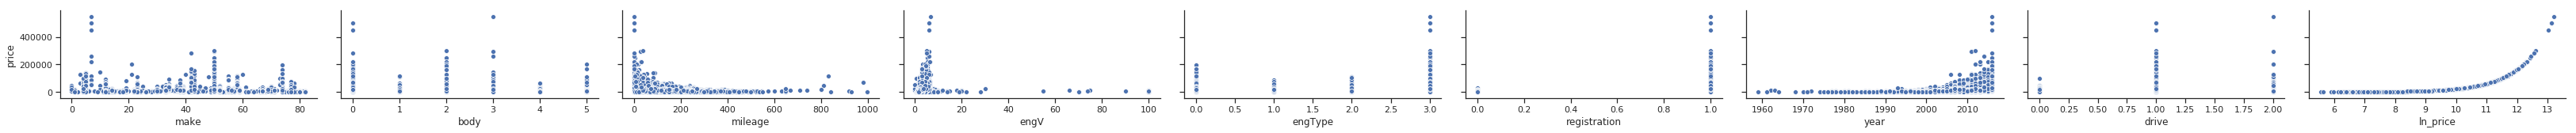

In [73]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers that doesnt include price
x_columns = df.columns.drop('price')

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df, y_vars=['price'], x_vars=x_columns, height=2.5, aspect=2)

## 2.3 If appropriate, create any polynomial features. 

### After checking all the scatterplots, I think all these features: make, engType, , body, and year are good candidates for polymonial transforamtions. Their shapes tell me that they are not linear in their nature. Year is more like an exponential form. 

In [74]:
#Let's engineer our features 
df['make_squared'] = df['make']**2
df['engType_squared'] = df["engType"]**2
#df['registration_sqaured'] = df['registration']**2
df['body_squared'] = df['body']**2
df['year_sqaured'] = df['year']**2

In [75]:
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'ln_price', 'make_squared', 'engType_squared',
       'body_squared', 'year_sqaured'],
      dtype='object')

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

### we are using our log price and also new features. 

In [77]:
X = df.drop(['ln_price','price'], axis=1)

In [79]:
X.columns

Index(['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'year',
       'drive', 'make_squared', 'engType_squared', 'body_squared',
       'year_sqaured'],
      dtype='object')

In [76]:
#Use log price, our new column
y = df['ln_price']

#this incldues all the new features we added to X matrix
X = df.drop(['ln_price','price'], axis=1)

#for consistency, we will stick to the same split model we train in our previous cells
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.3, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

#let's print MSE and RMSE
rint('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

#Printing Coeffs and the intercept
print("coefficients: ", model.coef_)
print("intercepts: ", model.intercept_)


RMSE is 0.5525026958256892
R^2 is 0.6753891103238063
coefficients:  [-2.44648052e-03 -1.95855058e-01  6.00967260e-04  8.00273408e-03
 -2.60634684e-01  6.98848121e-01 -5.59836482e+00  3.66827864e-01
  8.46734203e-06  7.17188136e-02  2.27391661e-02  1.42270959e-03]
intercepts:  5513.834426587701


### Since we are using log price, our RMSE is in percentage terms. Easier to interpret. 

#### RMSE is 0.5525026958256892
#### R^2 is 0.6753891103238063
#### coefficients:  [-2.44648052e-03 -1.95855058e-01  6.00967260e-04  8.00273408e-03
 -2.60634684e-01  6.98848121e-01 -5.59836482e+00  3.66827864e-01
  8.46734203e-06  7.17188136e-02  2.27391661e-02  1.42270959e-03]
#### intercepts:  5513.834426587701

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

-5.59836482e+00 The year has now a negative coefficeint meaning that every additional year will lower the price by -5.59836482e+00. 

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

It minimizes the cost by finding the local minima of the cost fucntion. 

## 3.2 What is the "Learning Rate" and what is its function?

## Learning rate is the steps the gradeint descent take to reach the valley/minima. Basically, at each step what speed you want to go down the slope is the learning rate. 

### Step = learning rate * gradient. 

### x_next = x_current - learning rate * gradient. 

### x represents  parameters 


# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

### We are running a log-polynomial regression here, we incldue all the features we we engineered. 

In [40]:
# X matrix
X = df[['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'ln_price', 'make_squared', 'engType_squared',
       'registration_sqaured', 'body_squared', 'year_sqaured']] 

#y vector
y = df['ln_price']

# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

#obust standard errors essentially correct heteroskedasticity in our data
#cov_type = "HC3" is to compute robust standard error
model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.369e+23
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        08:53:03   Log-Likelihood:             1.8736e+05
No. Observations:                8495   AIC:                        -3.747e+05
Df Residuals:                    8480   BIC:                        -3.746e+05
Df Model:                          14                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.364e-11 

/home/mishraka/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 15, but rank is 14
  'rank is %d' % (J, J_), ValueWarning)


### Lookign at the table above, most the p values (all of them are 1 or close to 1)indicate that our null hypothesis is true that mean those features have no relationhsip with price. Interesting. 

### all our standard errors are in terms of percentages now. 

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [41]:
print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'make', 'price', 'body', 'mileage', 'engV', 'engType',
       'registration', 'year', 'drive', 'ln_price', 'make_squared',
       'engType_squared', 'registration_sqaured', 'body_squared',
       'year_sqaured'],
      dtype='object') 


[3168613602.9407234, 16.997657675766465, 2.4536651168256673, 11.755535754257531, 1.9882675373582313, 1.0189060477794087, 34.17047145149341, inf, 152176.19614831373, 1.3993841812342045, 5.159611052410717, 16.873573865145197, 32.0728739328255, inf, 12.061800866360773, 152601.60053197082]


/home/mishraka/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


### Yes, we clearly have multicollinearity problems here. 
### Rule of Thumb: If our VIF is greater than 10 for any features, that indicates multicollinearity problems. 
16.997657675766465
inf
152176.19614831373
16.873573865145197, 
32.0728739328255, 
inf, 
12.061800866360773, 
152601.60053197082

### As we can see, our dataset has lots or multicollinear features. This violates the OLS BLUE assumptions and OLS might the right type of regression model for this dataset. 
